In [2]:
pip install yahooquery pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=bf9394e572a8234fbc37ce39d4cd4836d8549875dd57387d404dc68c0ee0c794
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [81]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas.io.excel import read_excel
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
from yahooquery import search
import datetime

from google.colab import files
list_sp = files.upload()
file_name1 = next(iter(list_sp))
df_green = pd.read_excel(file_name1)
df_green = df_green['name']
plt.style.use('fivethirtyeight')

Saving Zero Pledge.xlsx to Zero Pledge (1).xlsx


In [82]:
yf.pdr_override()
def stock_universe(tickers, start_date, end_date):
  """
  This function searchs and get the information from the yahoo finance for the
  adj price

  Args:
    tickers = List data type of list of all of the stocks tickers
    start_date = String formart and YYYY-MM-DD
    end_date = String formart and YYYY-MM-DD

  returns:
    data = returns DataFrame of all the stocks and the adj price
  """

  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Close']

  return data

def get_ticker(df):
    """
    This function takes a dataframe with the list of company names and returns a dataframe with the corresponding tickers.

    Args:
        df (DataFrame): A dataframe containing company names.

    Returns:
        df_tickers (DataFrame): A dataframe with tickers.
    """
    # Create a new dataframe with uppercase company names
    df_upper_case = pd.DataFrame(df)
    df_upper_case['comps'] = df.str.upper()

    # Create columns for info and tickers
    df_upper_case['info'] = ''
    df_upper_case['tickers'] = ''

    # Search for tickers by name
    for i, row in df_upper_case.iterrows():
        search_results = search(row['comps'])
        if 'quotes' in search_results:
            quotes = search_results['quotes']
            if quotes:
                df_upper_case.at[i, 'info'] = quotes[0]
                df_upper_case.at[i, 'tickers'] = quotes[0]['symbol']

    return df_upper_case

# Lets get the ticker information since the data is provided only with
# the name of the stock and the functiona nd yfinance only takes tickers
df_green['ticker'] = get_ticker(df_green)
print(df_green['ticker']['tickers'])

# Here we gather quite a lot of information and we filter it for better use
df_g = df_green['ticker']['tickers']

# convert the Df to a list for creating the universe
ticker_symbols = df_g.tolist()
start_date = "2018-01-01"
end_date = "2023-09-10"
stock_data = stock_universe(ticker_symbols, start_date, end_date)


0         NFLX
1      EBT-USD
2            V
3         BERY
4           GM
        ...   
572     0HRZ.L
573       BBWI
574       FANG
575        HEI
576      WPY.F
Name: tickers, Length: 577, dtype: object


ERROR:yfinance:Could not get exchangeTimezoneName for ticker '' reason: list index out of range


[*********************100%%**********************]  554 of 554 completed

ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['']: %ticker%E%ticker%x%ticker%c%ticker%e%ticker%p%ticker%t%ticker%i%ticker%o%ticker%n%ticker%(%ticker%'%ticker%:%ticker% %ticker%N%ticker%o%ticker% %ticker%t%ticker%i%ticker%m%ticker%e%ticker%z%ticker%o%ticker%n%ticker%e%ticker% %ticker%f%ticker%o%ticker%u%ticker%n%ticker%d%ticker%,%ticker% %ticker%s%ticker%y%ticker%m%ticker%b%ticker%o%ticker%l%ticker% %ticker%m%ticker%a%ticker%y%ticker% %ticker%b%ticker%e%ticker% %ticker%d%ticker%e%ticker%l%ticker%i%ticker%s%ticker%t%ticker%e%ticker%d%ticker%'%ticker%)%ticker%
ERROR:yfinance:['US92556H1077.SG', '^RTX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-01-01 00:00:00 -> 2023-09-10 00:00:00)')


In [83]:
print(stock_data.columns)

Index(['', '0HG8.L', '0HRZ.L', '0IZI.L', '0J7Q.L', '0L7F.L', '0QYJ.IL', 'A',
       'AAL', 'AAP',
       ...
       'XYL', 'YUM', 'Z0Y.SG', 'ZBH', 'ZBRA', 'ZION', 'ZM', 'ZTS', '^IXIC',
       '^RTX'],
      dtype='object', length=554)


In [85]:
# create a new and more clean DF, drop all the columns that are not stocks
clean_g = stock_data[stock_data.columns[~stock_data.columns.str.contains('[\.\^]')]]
print(clean_g.columns)

Index(['', 'A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABT', 'ACM', 'ADBE', 'ADI',
       ...
       'XOM', 'XPO', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZM', 'ZTS'],
      dtype='object', length=534)


In [86]:
# Drop all the empty columns
clean_g = clean_g.dropna(axis=1, how='all')
print(clean_g.columns)

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABT', 'ACM', 'ADBE', 'ADI', 'ADM',
       ...
       'XOM', 'XPO', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZM', 'ZTS'],
      dtype='object', length=533)


In [87]:
# Calculte the annual mean returns and variances
daily_returns = clean_g.pct_change()
annual_mean_returns = daily_returns.mean() * 252
annual_return_variance = daily_returns.var() * 252


In [104]:
# Create a new dataframe
df = pd.DataFrame(clean_g.columns, columns=['ticker'])
#print(df)
df['Variances'] = annual_return_variance.values
df['Returns'] = annual_mean_returns.values
print(df)
df = df[df['ticker'] != 'VFS']

df = df[df['ticker'] != 'SIVBQ']

    ticker  Variances   Returns
0        A   0.074464  0.118816
1      AAL   0.311340 -0.055826
2      AAP   0.121988 -0.012635
3     AAPL   0.092444  0.267767
4     ABBV   0.068615  0.099405
..     ...        ...       ...
528    ZBH   0.082708  0.041403
529   ZBRA   0.150980  0.216814
530   ZION   0.167536  0.025986
531     ZM   0.348631  0.200471
532    ZTS   0.068276  0.182573

[533 rows x 3 columns]


In [ ]:
# import pandas_ta as ta
'''
from scipy.stats import linregress
import pandas_ta as ta

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope


backrolling_n= 12

#df['ATR'] = clean_g.ta.atr(length = 15)
df['MA200'] = clean_g.ta.ema(length=200)
df['slopeMA200'] = df['MA200'].rolling(window=backrolling_n).apply(get_slope, raw=True)
df['RSI'] = clean_g.ta.rsi(length = 13)
df['slopeATR'] = df['ATR'].rolling(window=backrolling_n).apply(get_slope, raw=True)
'''


In [105]:
nan_count = df.isna().sum().sum()
print(nan_count)
df = df.dropna()
nan_count = df.isna().sum().sum()
print(nan_count)

1
0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

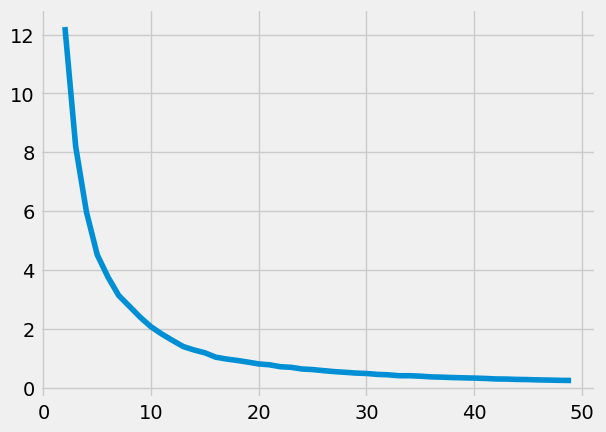

In [106]:
# Use elbow method to determine the number of clusters to model the stock data
X = df[['Returns','Variances']].values
inertia_list = []
for k in range (2, 50):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

plt.plot(range(2,50), inertia_list)
plt.show()

In [107]:
# Get the labels and the groups
kmeans = KMeans(n_clusters=20).fit(X)
labels = kmeans.labels_
df['clusters'] = labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


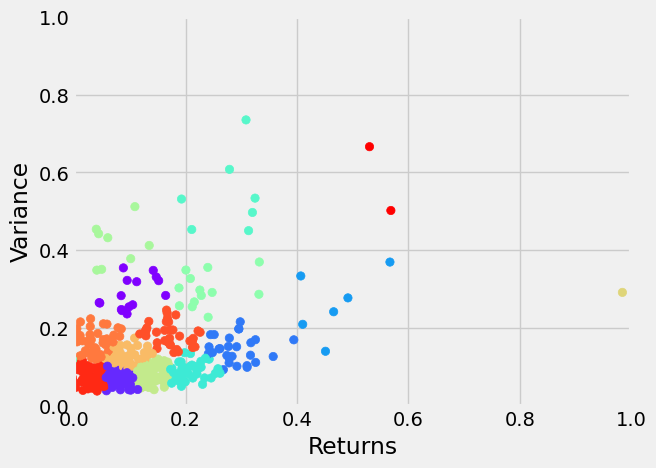

In [108]:
# Plot the Scaretter clusters
plt.scatter(X[:,0], X[:,1], c=labels,cmap = 'rainbow')
plt.xlabel('Returns')
plt.ylabel('Variance')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [109]:
# create the function to create a simple diversified portafolio
def div_port(df):
    # Group the DataFrame by the 'clusters' column and select the first row for each group
    result_df = df.groupby('clusters').head(1)[['ticker', 'clusters']]
    return result_df['ticker']
portfolio = div_port(df)

print(portfolio)

0         A
1       AAL
2       AAP
3      AAPL
4      ABBV
6       ACM
11     ADSK
13      AEL
14      AEP
16      AFG
23       AL
25      ALK
30      AMD
35     AMTD
45     ATUS
87      CAR
93      CCL
133     CYH
201    FRCB
511    WFRD
Name: ticker, dtype: object


# **Now tha we have a portfolio, lets decide how much of each stock we will invest**

In [110]:
def stock_universe_adj(tickers, start_date, end_date):
  """
  This function searchs and get the information from the yahoo finance for the
  adj price

  Args:
    tickers = List data type of list of all of the stocks tickers
    start_date = String formart and YYYY-MM-DD
    end_date = String formart and YYYY-MM-DD

  returns:
    data = returns DataFrame of all the stocks and the adj price
  """

  start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
  end_date = datetime.datetime.strptime(end_date, "%Y-%m-%d")

  data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date, period="1d")

  # Use the 'Adj Close' column to get the closing prices
  data = data['Adj Close']

  return data
assets = portfolio.tolist()
#print(assets)
weights = 1/len(assets)
n = len(assets)
result_array = np.repeat(weights,n)
#print(result_array)
opt_portfolio = pd.DataFrame()


opt_portfolio = stock_universe_adj(assets,start_date, end_date)

[*********************100%%**********************]  20 of 20 completed


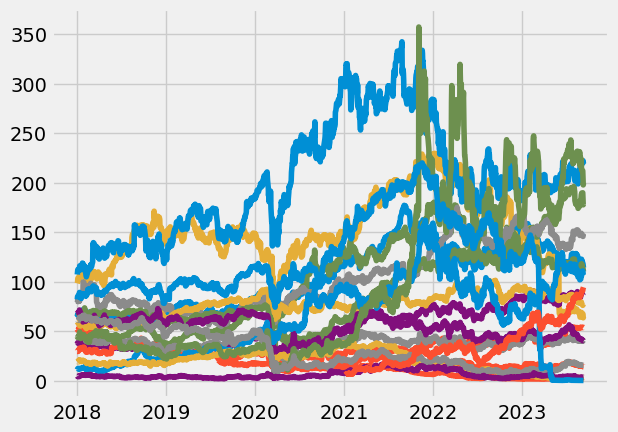

In [111]:
#print(opt_portfolio)
tmp = opt_portfolio
#tmp = np.cumsum(tmp)
plt.plot(tmp)
plt.show()

In [112]:
#lets get the simple daily return
returns = tmp.pct_change()

# Lets get the coveriance
cov_matrix_anual = returns.cov() *252
print(cov_matrix_anual) #< the sqrt of this coveriance between prices is the volatility

             A       AAL       AAP      AAPL      ABBV       ACM      ADSK  \
A     0.084229  0.053633  0.037240  0.051598  0.031279  0.047282  0.068951   
AAL   0.053633  0.351870  0.065970  0.061146  0.026726  0.088830  0.082485   
AAP   0.037240  0.065970  0.137828  0.039722  0.027941  0.047022  0.048651   
AAPL  0.051598  0.061146  0.039722  0.104370  0.029509  0.045974  0.078416   
ABBV  0.031279  0.026726  0.027941  0.029509  0.077431  0.032820  0.034902   
ACM   0.047282  0.088830  0.047022  0.045974  0.032820  0.108774  0.065210   
ADSK  0.068951  0.082485  0.048651  0.078416  0.034902  0.065210  0.163217   
AEL   0.054851  0.149171  0.073740  0.064116  0.039735  0.098855  0.076387   
AEP   0.022926  0.019082  0.024251  0.023585  0.016612  0.023784  0.020625   
AFG   0.043056  0.104668  0.056022  0.042275  0.034566  0.075659  0.049542   
AL    0.053263  0.189579  0.067122  0.061686  0.035964  0.106578  0.085965   
ALK   0.048416  0.208272  0.066777  0.051136  0.030428  0.085232

In [113]:
port_variance = np.dot(result_array.T,np.dot(cov_matrix_anual,result_array))
print(port_variance)
port_vol = np.sqrt(port_variance)
print(port_vol)


0.08867175281901565
0.29777802608489373


In [114]:
# Lets calculate Yearly return
port_simple_annual_return = np.sum(returns.mean() * result_array) * 252
print(f"portfolio Anual Return is {port_simple_annual_return}")
per_var = str(round(port_variance, 2)*100)
per_volatility = str(round(port_vol,2)*100)
per_returns = str(round(port_simple_annual_return,2)*100)

print(f"Expected annual return {per_returns}")
print(f"Expected risk {per_volatility}")
print(f"Annual variance {per_var}")


portfolio Anual Return is 0.18084549976846456
Expected annual return 18.0
Expected risk 30.0
Annual variance 9.0


In [101]:
pip install PyPortfolioOpt

In [115]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio optimization

mu = expected_returns.mean_historical_return(tmp)
S = risk_models.sample_cov(tmp)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose=True)
ef.save_weights_to_file("portfolio_weights.json")

OrderedDict([('A', 0.0), ('AAL', 0.0), ('AAP', 0.0), ('AAPL', 0.12833), ('ABBV', 0.03403), ('ACM', 0.0), ('ADSK', 0.0), ('AEL', 0.0), ('AEP', 0.0), ('AFG', 0.0), ('AL', 0.0), ('ALK', 0.0), ('AMD', 0.07091), ('AMTD', 0.0), ('ATUS', 0.0), ('CAR', 0.0), ('CCL', 0.0), ('CYH', 0.0), ('FRCB', 0.0), ('WFRD', 0.76673)])
Expected annual return: 149.3%
Annual volatility: 47.9%
Sharpe Ratio: 3.07


In [116]:
from numpy.ma.core import remainder
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(tmp)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 10000)

allocation, remainder = da.lp_portfolio()
print(allocation)
print(remainder)

{'AAPL': 7, 'ABBV': 2, 'AMD': 7, 'AMTD': 2, 'ATUS': 1, 'CYH': 1, 'FRCB': 15, 'WFRD': 81}
65.59030857479593


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
